# Python DL_NLP Crash Course_Part 5: Language Modelling with LSTM

## Full Day Workshop for user learn Data Science with Python
### 2017 Dec Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Character-Based Neural Language Model

# Word-Based Neural Language Model
## Framing Language Modeling

_* A statistical language model is learned from raw text and predicts the probability of the next word in the sequence given the words already present in the sequence. *_

Language models are a key component in larger models for challenging natural language processing problems, like machine translation and speech recognition. They can also be developed as standalone models and used for generating new sequences that have the same statistical properties as the source text.

Language models both learn and predict one word at a time. The training of the network involves providing sequences of words as input that are processed one at a time where a prediction can be made and learned for each input sequence.

Similarly, when making predictions, the process can be seeded with one or a few words, then predicted words can be gathered and presented as input on subsequent predictions in order to build up a generated output sequence

Therefore, each model will involve splitting the source text into input and output sequences, such that the model can learn to predict words.



In [85]:
# Sample Text being anlayzed:


# source text
data = """ Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n """

## Model 1: One-Word-In, One-Word-Out Sequences 
We can start with a very simple model.

Given one word as input, the model will learn to predict the next word in the sequence.

Keras provides the Tokenizer class that can be used to perform this encoding. First, the Tokenizer is fit on the source text to develop the mapping from words to unique integers. Then sequences of text can be converted to sequences of integers by calling the texts_to_sequences() function.

In [86]:
from keras.preprocessing.text import Tokenizer


# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 22


In [87]:
encoded[:]

[2,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 2,
 14,
 15,
 1,
 16,
 17,
 18,
 1,
 3,
 19,
 20,
 21]

We add one, because we will need to specify the integer for the largest encoded word as an array index, e.g. words encoded 1 to 21 with array indicies 0 to 21 or 22 positions.

Next, we need to create sequences of words to fit the model with one word as input and one word as output.

Running this piece shows that we have a total of 24 input-output pairs to train the network.

In [88]:
import array

In [89]:
# create word -> word sequences
sequences = list()
for i in range(1, len(encoded)):
	sequence = encoded[i-1:i+1]
	sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

#We can then split the sequences into input (X) and output elements (y). This is straightforward as we only have two columns in the data.





Total Sequences: 24


In [90]:
sequences[:]

[[2, 1],
 [1, 3],
 [3, 4],
 [4, 5],
 [5, 6],
 [6, 7],
 [7, 8],
 [8, 9],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13],
 [13, 2],
 [2, 14],
 [14, 15],
 [15, 1],
 [1, 16],
 [16, 17],
 [17, 18],
 [18, 1],
 [1, 3],
 [3, 19],
 [19, 20],
 [20, 21]]

In [91]:
# split into X and y elements
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]


We will fit our model to predict a probability distribution across all words in the vocabulary. That means that we need to turn the output element from a single integer into a one hot encoding with a 0 for every word in the vocabulary and a 1 for the actual word that the value. This gives the network a ground truth to aim for from which we can calculate error and update the model.

Keras provides the to_categorical() function that we can use to convert the integer to a one hot encoding while specifying the number of classes as the vocabulary size.

In [92]:
from keras.utils import to_categorical

In [93]:
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)

We are now ready to define the neural network model.

The model uses a learned word embedding in the input layer. This has one real-valued vector for each word in the vocabulary, where each word vector has a specified length. In this case we will use a 10-dimensional projection. The input sequence contains a single word, therefore the input_length=1.

The model has a single hidden LSTM layer with 50 units. This is far more than is needed. The output layer is comprised of one neuron for each word in the vocabulary and uses a softmax activation function to ensure the output is normalized to look like a probability.

In [94]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM

In [95]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 10)             220       
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_1 (Dense)              (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
None


We will use this same general network structure for each example in this tutorial, with minor changes to the learned embedding layer.

Next, we can compile and fit the network on the encoded text data. Technically, we are modeling a multi-class classification problem (predict the word in the vocabulary), therefore using the categorical cross entropy loss function. We use the efficient Adam implementation of gradient descent and track accuracy at the end of each epoch. The model is fit for 500 training epochs, again, perhaps more than is needed.

The network configuration was not tuned for this and later experiments; an over-prescribed configuration was chosen to ensure that we could focus on the framing of the language model.

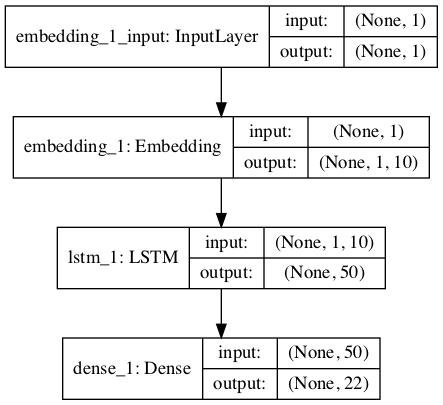

In [96]:

# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)

Epoch 1/500
0s - loss: 3.0923 - acc: 0.0000e+00
Epoch 2/500
0s - loss: 3.0918 - acc: 0.0000e+00
Epoch 3/500
0s - loss: 3.0911 - acc: 0.0000e+00
Epoch 4/500
0s - loss: 3.0904 - acc: 0.0417
Epoch 5/500
0s - loss: 3.0896 - acc: 0.0833
Epoch 6/500
0s - loss: 3.0889 - acc: 0.0833
Epoch 7/500
0s - loss: 3.0881 - acc: 0.0833
Epoch 8/500
0s - loss: 3.0874 - acc: 0.1250
Epoch 9/500
0s - loss: 3.0866 - acc: 0.1250
Epoch 10/500
0s - loss: 3.0858 - acc: 0.1250
Epoch 11/500
0s - loss: 3.0850 - acc: 0.1250
Epoch 12/500
0s - loss: 3.0842 - acc: 0.1250
Epoch 13/500
0s - loss: 3.0834 - acc: 0.1250
Epoch 14/500
0s - loss: 3.0826 - acc: 0.1250
Epoch 15/500
0s - loss: 3.0818 - acc: 0.1250
Epoch 16/500
0s - loss: 3.0809 - acc: 0.1250
Epoch 17/500
0s - loss: 3.0800 - acc: 0.1250
Epoch 18/500
0s - loss: 3.0792 - acc: 0.1250
Epoch 19/500
0s - loss: 3.0783 - acc: 0.1250
Epoch 20/500
0s - loss: 3.0773 - acc: 0.1250
Epoch 21/500
0s - loss: 3.0764 - acc: 0.1250
Epoch 22/500
0s - loss: 3.0754 - acc: 0.1250
Epoch 2

After the model is fit, we test it by passing it a given word from the vocabulary and having the model predict the next word. Here we pass in ‘Jack‘ by encoding it and calling model.predict_classes() to get the integer output for the predicted word. This is then looked up in the vocabulary mapping to give the associated word.

This process could then be repeated a few times to build up a generated sequence of words.

To make this easier, we wrap up the behavior in a function that we can call by passing in our model and the seed word.

In [97]:
# evaluate
in_text = 'Jack'
print(in_text)
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)
yhat = model.predict_classes(encoded, verbose=0)
for word, index in tokenizer.word_index.items():
	if index == yhat:
		print(word)

Jack
and


In [98]:
def generate_seq(model, tokenizer, seed_text, n_words):
	in_text, result = seed_text, seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		encoded = np.array(encoded)
		# predict a word in the vocabulary
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text, result = out_word, result + ' ' + out_word
	return result

In [99]:
print(generate_seq(model, tokenizer, 'Jack', 6))

Jack and jill came tumbling after hill


This is a good first cut language model, but does not take full advantage of the LSTM’s ability to handle sequences of input and disambiguate some of the ambiguous pairwise sequences by using a broader context.

#  Model 2: Line-by-Line Sequence

Another approach is to split up the source text line-by-line, then break each line down into a series of words that build up.

In [102]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [103]:
# Something like that:
#X,									y
#_, _, _, _, _, Jack, 				and
#_, _, _, _, Jack, and 				Jill
#_, _, _, Jack, and, Jill,			went
#_, _, Jack, and, Jill, went,		up
#_, Jack, and, Jill, went, up,		the
#Jack, and, Jill, went, up, the,		hill

This approach may allow the model to use the context of each line to help the model in those cases where a simple one-word-in-and-out model creates ambiguity.

In this case, this comes at the cost of predicting words across lines, which might be fine for now if we are only interested in modeling and generating lines of text.

Note that in this representation, we will require a padding of sequences to ensure they meet a fixed length input. This is a requirement when using Keras.

First, we can create the sequences of integers, line-by-line by using the Tokenizer already fit on the source text.

In [104]:
from keras.preprocessing.sequence import pad_sequences

# create line-based sequences
sequences = list()
for line in data.split('\n'):
	encoded = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(encoded)):
		sequence = encoded[:i+1]
		sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 21


Next, we can pad the prepared sequences. We can do this using the pad_sequences() function provided in Keras. This first involves finding the longest sequence, then using that as the length by which to pad-out all other sequences.

In [105]:

# pad input sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

Max Sequence Length: 7


## Next, we can split the sequences into input and output elements, much like before.

In [106]:
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

The model can then be dened as before, except the input sequences are now longer than a
single word. Specically, they are max length-1 in length, -1 because when we calculated the
maximum length of sequences, they included the input and output elements.

In [108]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=max_length-1))
    model.add(LSTM(50))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

We can use the model to generate new sequences as before. The generate seq() function
can be updated to build up an input sequence by adding predictions to the list of input words
each iteration.

In [109]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text

Running the example achieves a better t on the source data. The added context has allowed
the model to disambiguate some of the examples. There are still two lines of text that start
with \Jack" that may still be a problem for the network.

In [110]:
# define model
model = define_model(vocab_size, max_length)
# fit network
model.fit(X, y, epochs=500, verbose=2)
# evaluate model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 6, 10)             220       
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_2 (Dense)              (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
0s - loss: 3.0900 - acc: 0.0476
Epoch 2/500
0s - loss: 3.0888 - acc: 0.0952
Epoch 3/500
0s - loss: 3.0875 - acc: 0.1905
Epoch 4/500
0s - loss: 3.0861 - acc: 0.2381
Epoch 5/500
0s - loss: 3.0847 - acc: 0.1905
Epoch 6/500
0s - loss: 3.0831 - acc: 0.1429
Epoch 7/500
0s - loss: 3.0815 - acc: 0.1905
Epoch 8/500
0s - loss: 3.0799 - acc: 0.1429
Epoch 9/500
0s - loss: 3.0782 - acc: 0.1429
Epoch 

In [114]:
print(generate_seq(model, tokenizer, max_length-1, 'Jack', 4))
print(generate_seq(model, tokenizer, max_length-1, 'Jill', 4))

Jack fell down and broke
Jill jill came tumbling after


At the end of the run, we generate two sequences with dierent seed words: Jack and Jill.
The rst generated line looks good, directly matching the source text. The second is a bit
strange. This makes sense, because the network only ever saw Jill within an input sequence,
not at the beginning of the sequence, so it has forced an output to use the word Jill

#

## Model 3: Two-Words-In, One-Word-Out Sequence

We can use an intermediate between the one-word-in and the whole-sentence-in approaches
and pass in a sub-sequences of words as input. This will provide a trade-o between the two
framings allowing new lines to be generated and for generation to be picked up mid line. We will
use 3 words as input to predict one word as output. The preparation of the sequences is much
like the rst example, except with dierent osets in the source sequence arrays, as follows:

In [118]:
# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
    sequence = encoded[i-2:i+1]
    sequences.append(sequence)
    print('Total Sequences: %d' % len(sequences))

In [120]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text


In [ ]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=max_length-1))
    model.add(LSTM(50))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [122]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]
# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
    sequence = encoded[i-2:i+1]
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
# define model
model = define_model(vocab_size, max_length)
# fit network
model.fit(X, y, epochs=500, verbose=2)

Vocabulary Size: 22
Total Sequences: 23
Max Sequence Length: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 2, 10)             220       
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_3 (Dense)              (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1s - loss: 3.0911 - acc: 0.0435
Epoch 2/500
0s - loss: 3.0904 - acc: 0.0000e+00
Epoch 3/500
0s - loss: 3.0897 - acc: 0.0435
Epoch 4/500
0s - loss: 3.0889 - acc: 0.0870
Epoch 5/500
0s - loss: 3.0881 - acc: 0.1304
Epoch 6/500
0s - loss: 3.0873 - acc: 0.1304
Epoch 7/500
0s - loss: 3.0864 - acc: 0.1304
Epoch 8/500
0s - loss: 3.08

In [123]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Jack and', 5))
print(generate_seq(model, tokenizer, max_length-1, 'And Jill', 3))
print(generate_seq(model, tokenizer, max_length-1, 'fell down', 5))
print(generate_seq(model, tokenizer, max_length-1, 'pail of', 5))

Jack and jill came tumbling after and
And Jill came tumbling after
fell down and broke his crown and
pail of water jack fell down and


## Summary
The rst start of line case generated correctly, but the second did not. The second case was
an example from the 4th line, which is ambiguous with content from the rst line. Perhaps a
further expansion to 3 input words would be better. The two mid-line generation examples were
generated correctly, matching the source text.
We can see that the choice of how the language model is framed and the requirements on
how the model will be used must be compatible. That careful design is required when using
language models in general, perhaps followed-up by spot testing with sequence generation to
conrm model requirements have been met.

In [124]:
# The code was removed by DSX for sharing.

In [127]:
filename = 'rhyme.txt'
file = open(filename, 'rt')
text = file.read()

IOError: [Errno 2] No such file or directory: 'rhyme.txt'

In [128]:
import string
import re

In [ ]:
# The code was removed by DSX for sharing.

In [ ]:

# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/2.0.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession
# The SparkSession object is already initialized for you.
# The following variable contains the path to your file on your IBM Cloud Object Storage.
path_2 = cos.url('cv000_29590.txt', 'singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5')
